In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
%matplotlib inline

import seaborn as sns

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv(r"NSE-TATAGLOBAL.csv")
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [21]:
df.shape

(2100, 8)

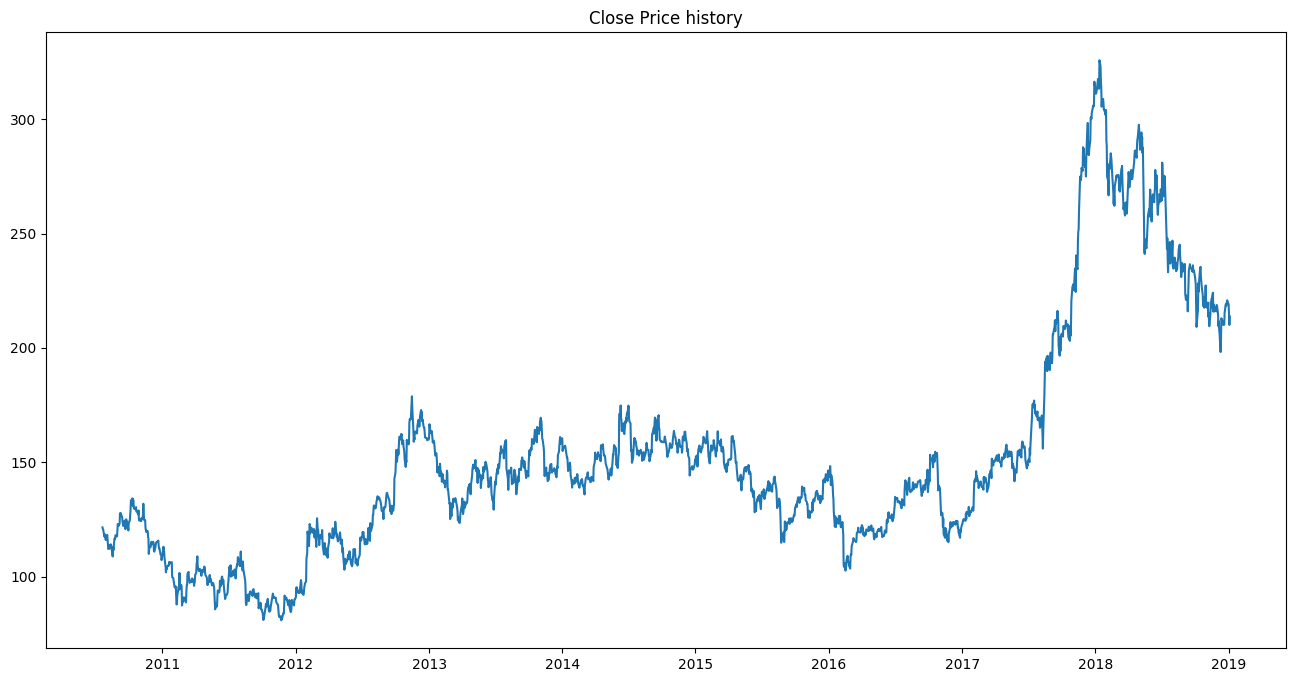

In [6]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"])

plt.title('Close Price history')
plt.show()

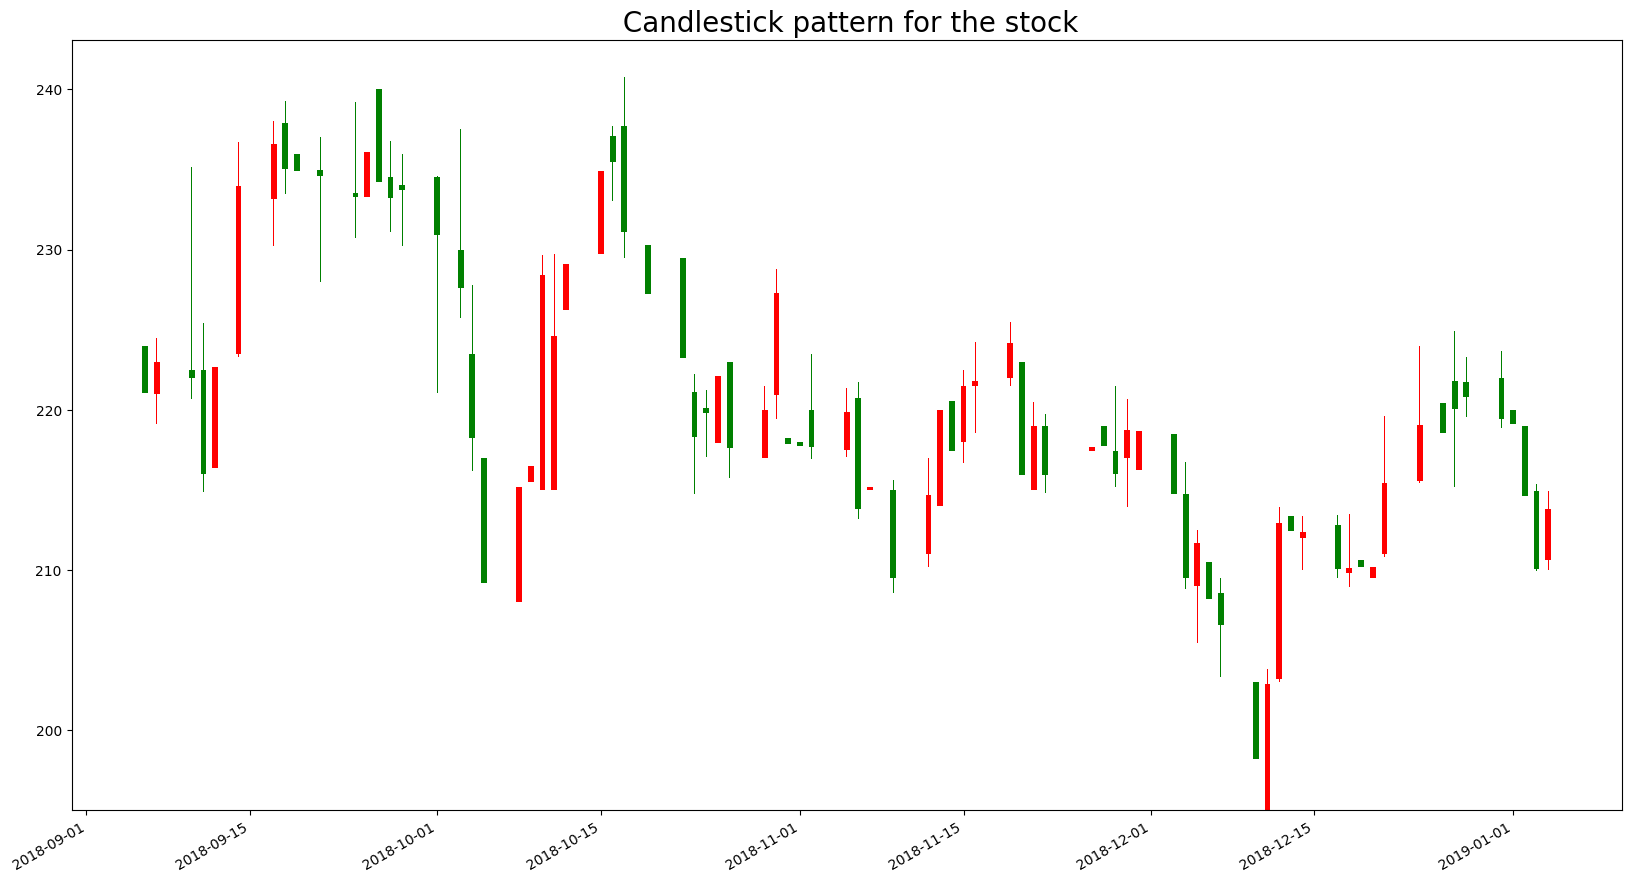

In [7]:
stock_prices=df.head(80)

                            
plt.figure()

up = stock_prices[stock_prices.Close >= stock_prices.Open]
down = stock_prices[stock_prices.Close < stock_prices.Open]
  
col1 = 'red'
col2 = 'green'
  
width = .5
width2 = .05
  
plt.bar(up.index, up.Close-up.Open, width, bottom=up.Open, color=col1)
plt.bar(up.index, up.High-up.Close, width2, bottom=up.Close, color=col1)
plt.bar(up.index, up.Low-up.Open, width2, bottom=up.Open, color=col1)
  
plt.bar(down.index, down.Close-down.Open, width, bottom=down.Open, color=col2)
plt.bar(down.index, down.High-down.Open, width2, bottom=down.Open, color=col2)
plt.bar(down.index, down.Low-down.Close, width2, bottom=down.Close, color=col2)
plt.title(" Candlestick pattern for the stock",size=20)

plt.xticks(rotation=30,ha="right")

plt.show()

In [22]:
df1=pd.DataFrame(df['Close'])
df1.set_index(np.arange(0,2100),inplace=True)

In [24]:
df1

,Close
0,213.80
1,210.05
2,214.60
3,219.10
4,219.40
...,...
2095,118.65
2096,117.60
2097,120.65
2098,120.90


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
print(df1)

[[0.54268791]
 [0.52736928]
 [0.54595588]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [27]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(1365, 735)

In [32]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [33]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [53]:
X_train.shape

(1264, 100, 1)

In [35]:
y_train.shape

(1264,)

In [36]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [38]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
20/20 [==============================] - 7s 73ms/step - loss: 0.0419 - val_loss: 0.0026
Epoch 2/100
20/20 [==============================] - 1s 28ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 3/100
20/20 [==============================] - 1s 27ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 4/100
20/20 [==============================] - 1s 28ms/step - loss: 0.0019 - val_loss: 8.9738e-04
Epoch 5/100
20/20 [==============================] - 1s 29ms/step - loss: 0.0017 - val_loss: 8.7514e-04
Epoch 6/100
20/20 [==============================] - 1s 27ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 7/100
20/20 [==============================] - 1s 28ms/step - loss: 0.0016 - val_loss: 8.0579e-04
Epoch 8/100
20/20 [==============================] - 1s 28ms/step - loss: 0.0015 - val_loss: 8.6685e-04
Epoch 9/100
20/20 [==============================] - 1s 27ms/step - loss: 0.0014 - val_loss: 8.8694e-04
Epoch 10/100
20/20 [==============================] - 1s 27ms/step - loss: 0.001

In [51]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
len(X_test)

20/20 [==============================] - 0s 11ms/step


634

In [69]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
len(test_predict)

634

In [42]:
import math
from sklearn.metrics import mean_squared_error

In [43]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(ytest,test_predict)))

170.44815831434244
117.20737387053512


In [78]:

df2=pd.DataFrame(test_predict)
df2.set_index(np.arange(1466,2100),inplace=True)

#test_data['Predictions']=test_predict
#plt.plot(test_data[['Close','Predictions']])

In [79]:
df2['Preds']=np.array(test_predict)

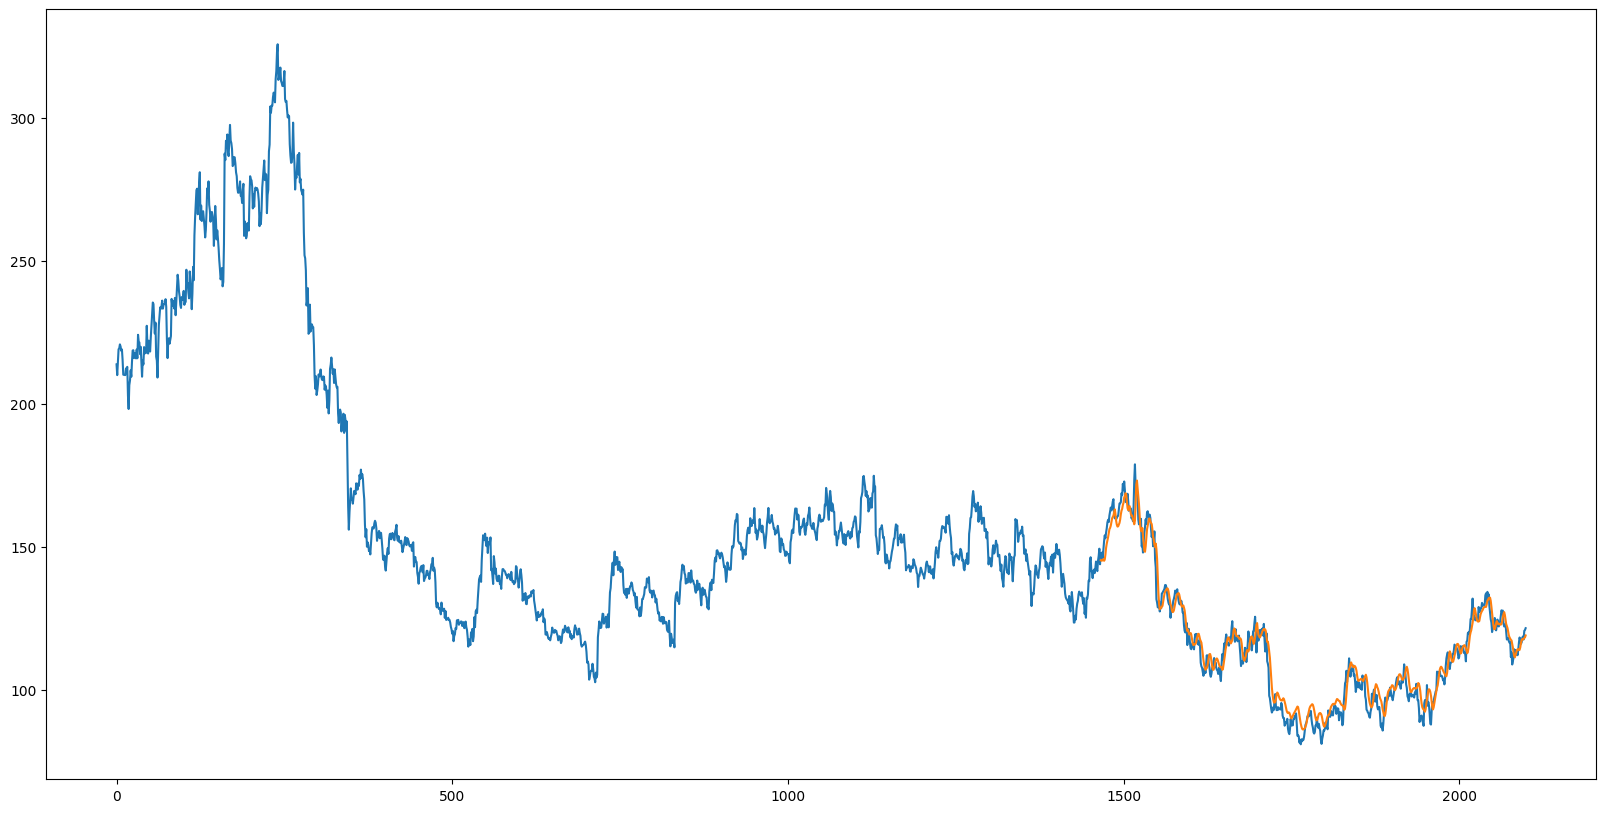

In [75]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(df2['Preds'])

In [81]:
len(test_data)

735

In [82]:
x_input=test_data[635:].reshape(1,-1)
x_input.shape

(1, 100)

In [83]:
temp_input=list(x_input)


In [85]:
temp_input=temp_input[0].tolist()

In [86]:
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [87]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])        
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))        
        yhat = model.predict(x_input, verbose=0)        
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)        
        temp_input.extend(yhat[0].tolist())        
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.1626964509487152], [0.16446781158447266], [0.16512273252010345], [0.16535784304141998], [0.16540108621120453], [0.1653619408607483], [0.1652706116437912], [0.16517522931098938], [0.16507969796657562], [0.1650012880563736], [0.16494517028331757], [0.1648717075586319], [0.16486188769340515], [0.16488054394721985], [0.1648876816034317], [0.16488373279571533], [0.16488531231880188], [0.16488222777843475], [0.1649165004491806], [0.16493315994739532], [0.16492298245429993], [0.16490955650806427], [0.16486693918704987], [0.16491766273975372], [0.16493910551071167], [0.16494207084178925], [0.16498643159866333], [0.16501058638095856], [0.1650264412164688], [0.16506634652614594]]


In [88]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


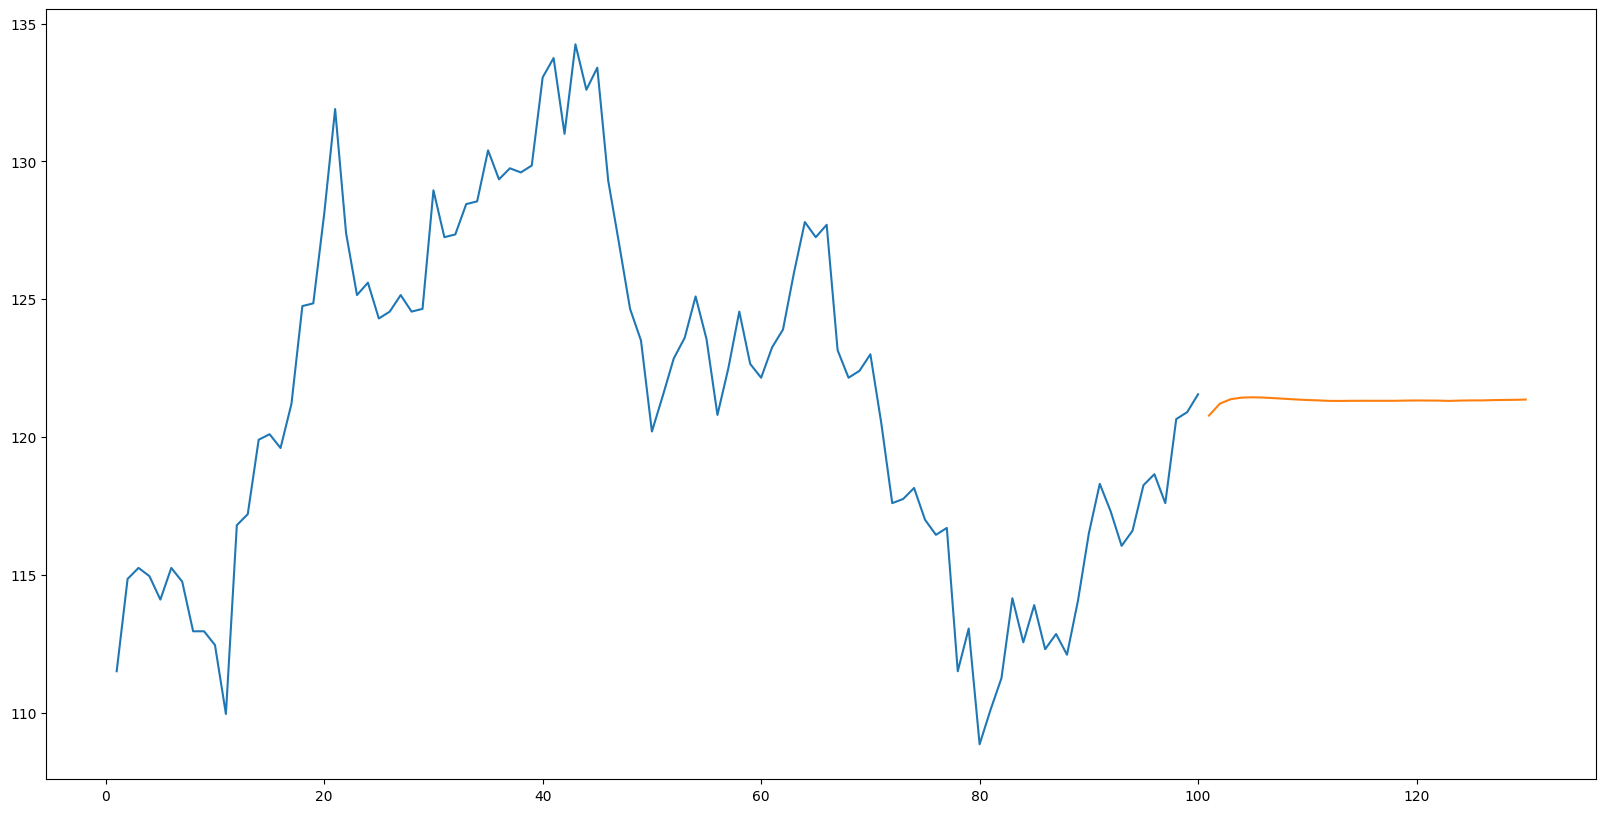

In [89]:
plt.plot(day_new,scaler.inverse_transform(df1[2000:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


(2100, 1)